## ----------------------------------------------------------------------------------------------------------------------------------

#  HEART DISEASE PREDICTION : RANDOM FOREST


## ----------------------------------------------------------------------------------------------------------------------------------

## Problem Statement:
- Predict whether the person will have heart disease in upcoming ten years.


## Objective: 
   -  To build a model that predicts heart disease. (note the target Variable is 'TenYearCHD')

## Dataset:  
   - The dataset provides the patients’ information.
   - It includes over 4,240 records and 15 attributes.        

## Attributes:

#### Demographic:
 - gender: male(1) or female(0)
 - Age: Age of the patient
 - Education: no further information provided
 
#### Behavioral:
 - Current Smoker: whether or not the patient is a current smoker 
 - Cigs Per Day: the number of cigarettes that the person smoked on average in one day.

#### Information on medical history:
 - BP Meds: whether or not the patient was on blood pressure medication 
 - Prevalent Stroke: whether or not the patient had previously had a stroke 
 - Prevalent Hyp: whether or not the patient was hypertensive 
 - Diabetes: whether or not the patient had diabetes 

#### Information on current medical condition:
 - Tot Chol: total cholesterol level
 - Sys BP: systolic blood pressure
 - Dia BP: diastolic blood pressure 
 - BMI: Body Mass Index 
 - Heart Rate: heart rate 
 - Glucose: glucose level

#### Target variable to predict:
 - 10 year risk of heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)

## ----------------------------------------------------------------------------------------------------------------------------------


### STEP 1:  IMPORTING LIBRARIES

In [1]:
# Python library for data analysis
import pandas as pd

# Python library for data visualization
import matplotlib.pyplot as plt

# Python library for large multi-dimensional array and matrix processing
import numpy as np



import seaborn as sns

### STEP 2:  READ DATASET

In [2]:
# Reading data from CSV file and converted into a pandas dataframe(df)
df= pd.read_csv('Heart.csv')

In [3]:
 # Dimensions of the dataset
df.shape

(4240, 16)

In [4]:
# Check first 9 records
df.head(9)

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


### STEP 3:  DATA  PREPROCESSING

In [6]:
# Check for NULL Values
df.isnull().sum()

gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
# REPLACE NULL VALUE WITH MEDIAN


df["education"] = df["education"].fillna(df["education"].median())
df["cigsPerDay"] = df["cigsPerDay"].fillna(df["cigsPerDay"].median())
df["BPMeds"] = df["BPMeds"].fillna(df["BPMeds"].median())
df["totChol"] = df["totChol"].fillna(df["totChol"].median())
df["BMI"] = df["BMI"].fillna(df["BMI"].median())
df["heartRate"] = df["heartRate"].fillna(df["heartRate"].median())
df["glucose"] = df["glucose"].fillna(df["glucose"].median())

df.isnull().sum()

gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
# Check for outliers
df.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979953,0.494104,8.944340,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.799005,75.878774,81.600943,0.151887
std,0.495027,8.572942,1.007087,0.500024,11.904777,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.070775,12.023937,22.860340,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


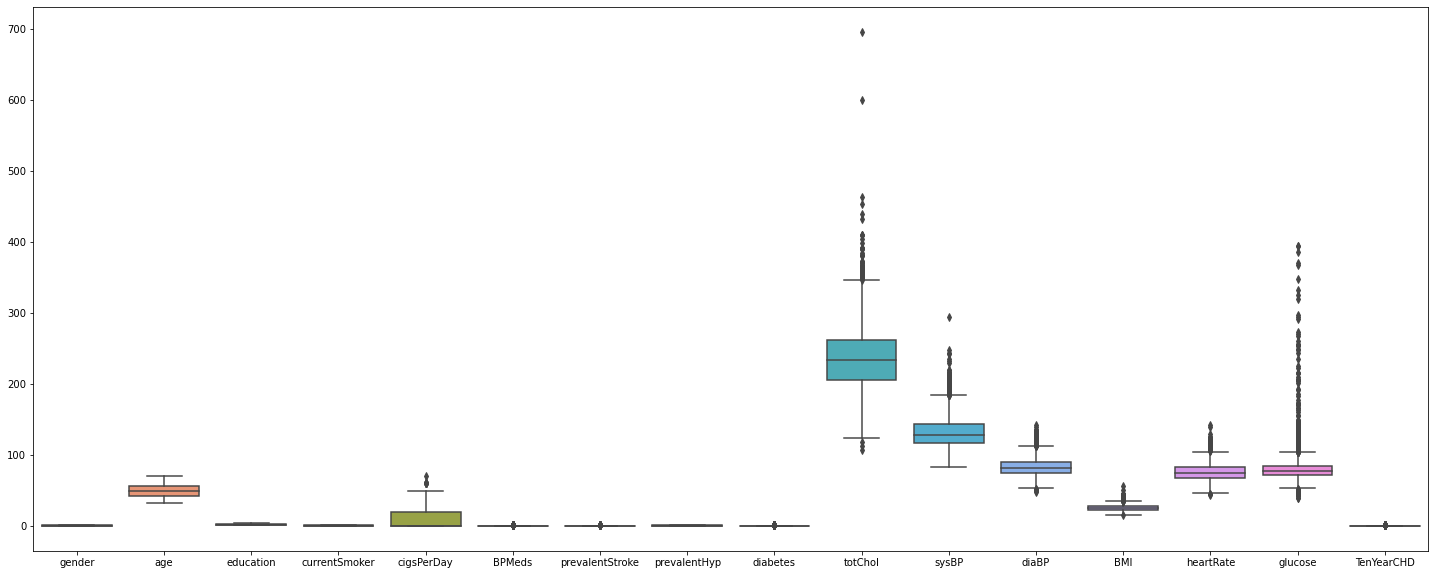

In [9]:
plt.figure(figsize=(25,10), facecolor='w')
sns.boxplot(data=df)
plt.show()

- Outliers are detected in totChol column of our dataset

In [10]:
# treating of outliers for totChol

# getting median
totChol_df= pd.DataFrame(df["totChol"])
totChol_median = totChol_df.median()

# IQR for totChol 
Q3 = totChol_df.quantile(q=0.75)
Q1 = totChol_df.quantile(q=0.25)
IQR = Q3-Q1

# boundries of outliers
IQR_LL = int(Q1-1.5*IQR)
IQR_UL = int(Q3-1.5*IQR)

# finding and treating of outliers
df.loc[df['totChol']>IQR_UL, 'totChol'] = int(totChol_df.quantile(q=0.99))
df.loc[df['totChol']>IQR_LL, 'totChol'] = int(totChol_df.quantile(q=0.01))

### STEP 4: EXPLORATORY DATA ANALYSIS

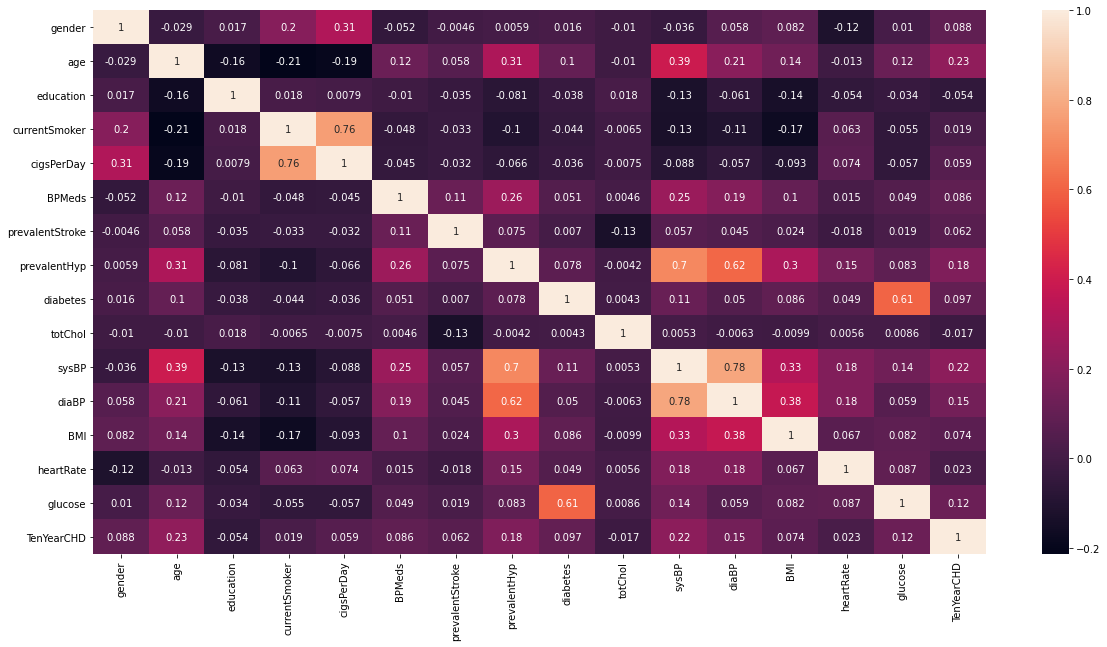

In [11]:
plt.figure(figsize=(20,10))
plot=sns.heatmap(df.corr(), annot= True)

- from above correlation education column has least correlation with target attribute i.e. TenYearCHD.
- Hence drop the education column

In [12]:
df.drop(['education'],inplace= True, axis=1)

### STEP 5: RESAMPLING IMBALANCED DATASET

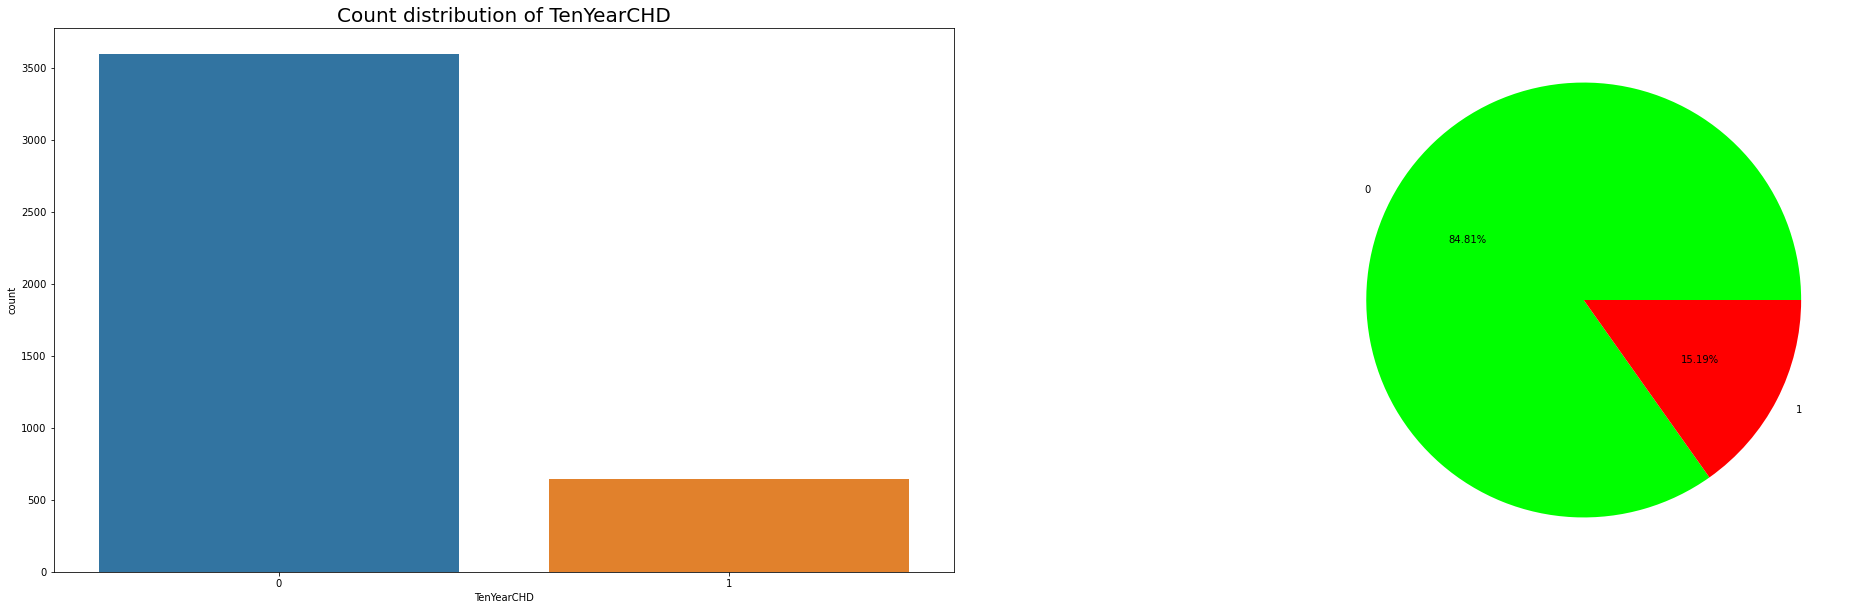

In [13]:
#Distribution of outcome variable, Heart Disease
plt.figure(figsize=(20, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)

sns.countplot(x="TenYearCHD", data=df)
plt.title("Count distribution of TenYearCHD", size=20)
plt.subplot(122)

labels=[0,1]
plt.pie(df["TenYearCHD"].value_counts(),autopct="%1.2f%%",labels=labels,colors=["lime","red"])
plt.show()

The distribution is highly imbalanced. As in, the number of negative cases outweigh the number of positive cases. This would lead to class imbalance problem while fitting our models. Therefore, this problem needs to be addressed

In [14]:
# RESAMPLING IMBALANCED DATASET

target1=df[df['TenYearCHD']==1]
target0=df[df['TenYearCHD']==0]

from sklearn.utils import resample
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)

target=pd.concat([target0,target1])
target['TenYearCHD'].value_counts()
df=target

df.head()

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,153.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,153.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,153.0,127.5,80.0,25.34,75.0,70.0,0
4,0,46,1,23.0,0.0,0,0,0,153.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,153.0,180.0,110.0,30.30,77.0,99.0,0


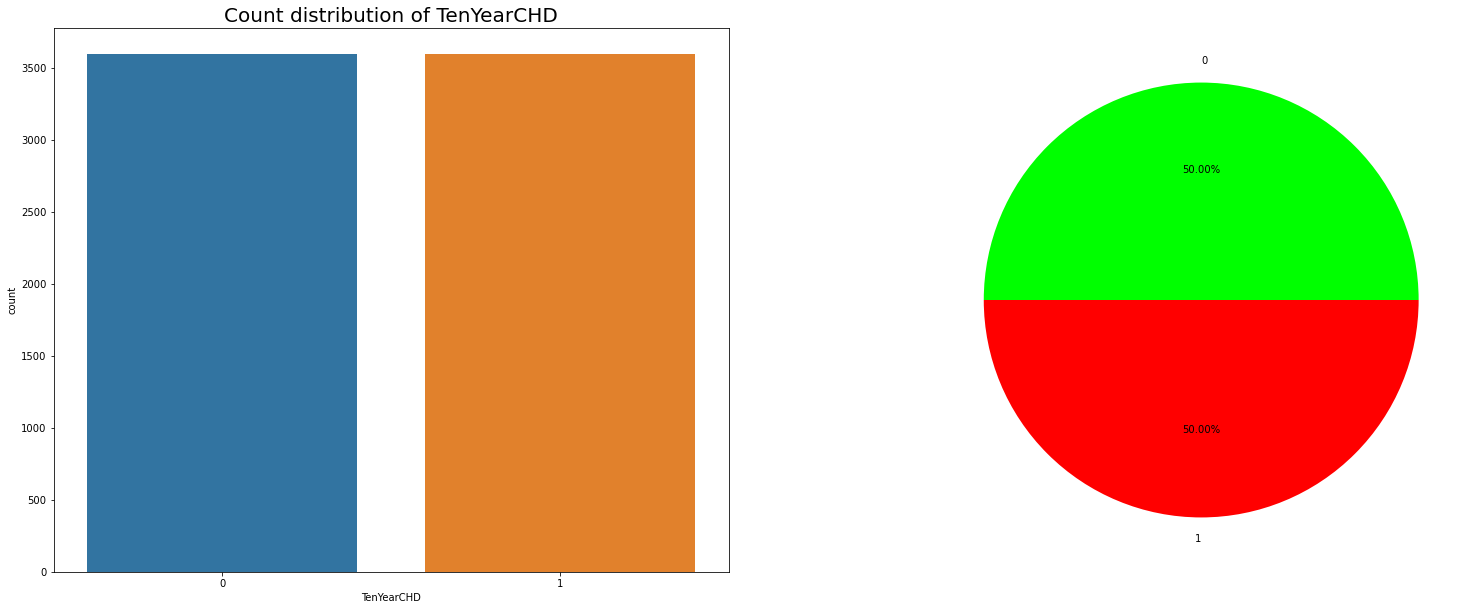

In [15]:
#Distribution of heart disease cases in the balanced dataset, the outcome variable

plt.figure(figsize=(15, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)

sns.countplot(x="TenYearCHD", data=df)
plt.title("Count distribution of TenYearCHD", size=20)
plt.subplot(122)

labels=[0,1]
plt.pie(df["TenYearCHD"].value_counts(),autopct="%1.2f%%",labels=labels,colors=["lime","red"])
plt.show()

### STEP 6:  FEATURE SELECTION

[0.02451383 0.18105502 0.01637893 0.05947703 0.00892133 0.00432177
 0.0410933  0.01068483 0.00023599 0.14338905 0.13284822 0.12937399
 0.12159776 0.12610893]


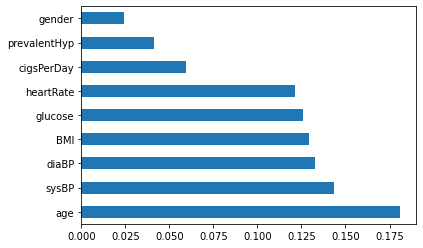

In [16]:


X = df.iloc[:,0:14]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

from sklearn.ensemble import ExtraTreesClassifier


model = ExtraTreesClassifier()

model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh')

plt.show()

In [17]:
df=df[['age','gender','cigsPerDay','prevalentHyp','heartRate','BMI','sysBP','diaBP','glucose','TenYearCHD']]

In [18]:
df.head()

,age,gender,cigsPerDay,prevalentHyp,heartRate,BMI,sysBP,diaBP,glucose,TenYearCHD
0,39,1,0.0,0,80.0,26.97,106.0,70.0,77.0,0
1,46,0,0.0,0,95.0,28.73,121.0,81.0,76.0,0
2,48,1,20.0,0,75.0,25.34,127.5,80.0,70.0,0
4,46,0,23.0,0,85.0,23.10,130.0,84.0,85.0,0
5,43,0,0.0,1,77.0,30.30,180.0,110.0,99.0,0


### STEP 7: TRAIN DATA

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### STEP 8: CHOOSE THE MODEL

In [23]:
from sklearn.ensemble._forest import RandomForestClassifier
my_model = RandomForestClassifier()

In [24]:
result = my_model.fit(X_train,y_train)
predictions = result.predict(X_test)


In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)


0.9715079916608756

In [26]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, predictions)

In [27]:

confusion_df = pd.DataFrame(confusion_mat,index=['Actual neg', 'Actual pos'], columns=['Predicted neg', 'Predicted pos'])
confusion_df

,Predicted neg,Predicted pos
Actual neg,673,38
Actual pos,3,725


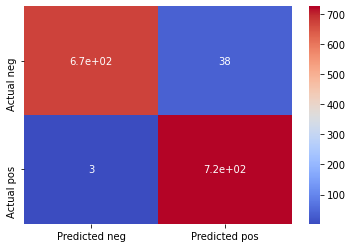

In [28]:
color_conf_matrix = sns.heatmap(confusion_df, cmap='coolwarm', annot = True)

### STEP 9: TEST DATA 

In [29]:
# classification Report

from sklearn import metrics
print('\n*Classification Report:\n',metrics.classification_report(y_test,predictions))


*Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       711
           1       0.95      1.00      0.97       728

    accuracy                           0.97      1439
   macro avg       0.97      0.97      0.97      1439
weighted avg       0.97      0.97      0.97      1439



#### EXAMPLE 1 

In [30]:
pred_new=my_model.predict([[55,1,20.0,1,75.0,32.2,180.0,90.0,85.0]])
pred_new

array([1], dtype=int64)

#### “1”, means  Risk of Heart Disease

#### EXAMPLE 2

In [31]:
pred_new=my_model.predict([[35,1,0,1,75.0,32.2,120.0,90.0,85.0]])
pred_new

array([0], dtype=int64)

#### “0”, means   No Risk of Heart Disease

## SAVE THE FILE


In [32]:

import pickle

# save model
pickle.dump(my_model, open('model.pkl', 'wb'))

# load model
Heart_disease_detector_model = pickle.load(open('model.pkl', 'rb'))

# predict the output
y_pred = Heart_disease_detector_model.predict(X_test)

# confusion matrix
print('Confusion matrix of K – Nearest Neighbor model: \n',confusion_matrix(y_test, y_pred),'\n')

# show the accuracy
print('Accuracy of Random Forest model = ',accuracy_score(y_test, y_pred))

Confusion matrix of K – Nearest Neighbor model: 
 [[673  38]
 [  3 725]] 

Accuracy of Random Forest model =  0.9715079916608756


# ---------------------------------------------------------------------------------------------------------------

#  THANK YOU !!!

# ---------------------------------------------------------------------------------------------------------------